In [7]:
include("runexp.jl");

In [8]:
function generateArmRewardModel(nArms::Int64)
    
    AM = Array(ArmModel, nArms)
    
    for i = 1:nArms
        AM[i] = ArmModel(0.01, 0.01, -50., 1., 1 / 2, 1 / (2 * (1 / 5. ^ 2)), -500., -1000., 1., 1 / 2, 1 / (2 * (1 / 1.^2)))
    end
    
    return AM
end;

# Stochastic Multi-Armed Bandit

Arm 1: Truncated(Distributions.Normal(μ=-30.0, σ=4.0), range=(-50.0, -10.0))
Arm 2: Truncated(Distributions.Normal(μ=-70.0, σ=10.0), range=(-120.0, -20.0))
mean of reward: -30.0, -70.0

Best arm: 1



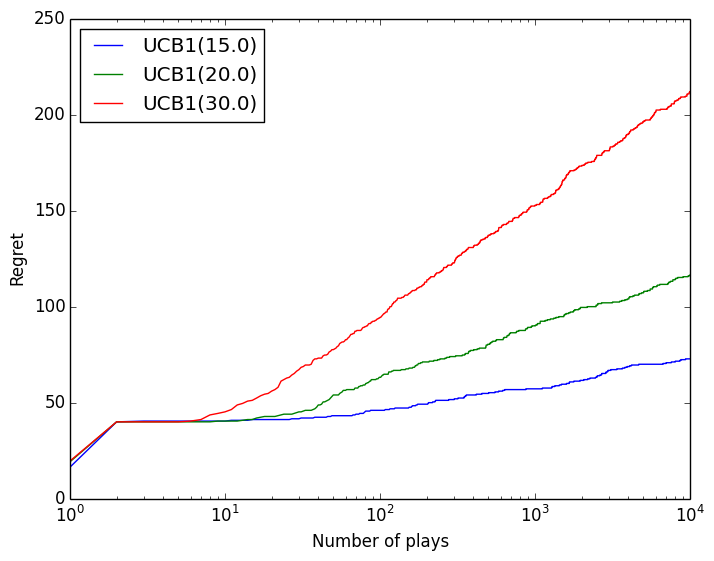

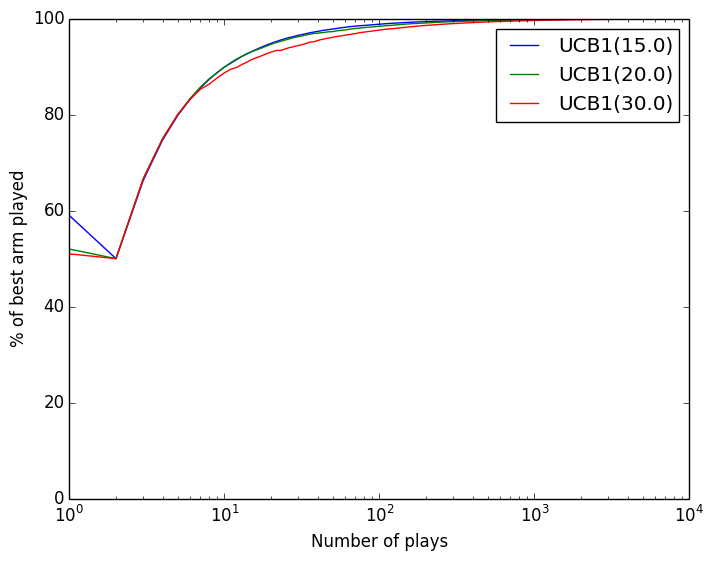

In [21]:
plotExpParam([RareDist(0., -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0., -1000., Truncated(Normal(-70, 10), -120, -20))], :UCB1, [15, 20, 30]);

Arm 1: 0.1, -1000.0; 0.9, Truncated(Distributions.Normal(μ=-30.0, σ=4.0), range=(-50.0, -10.0))
Arm 2: 0.1, -1000.0; 0.9, Truncated(Distributions.Normal(μ=-70.0, σ=10.0), range=(-120.0, -20.0))
mean of reward: -127.0, -163.0

Best arm: 1



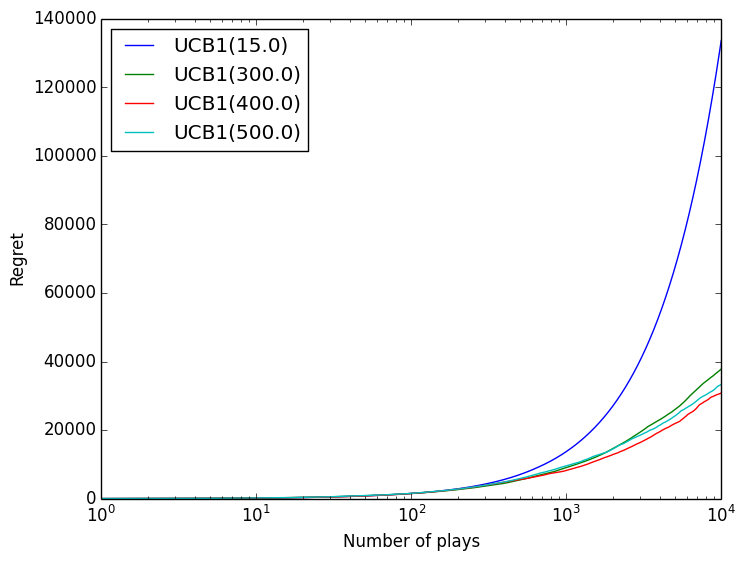

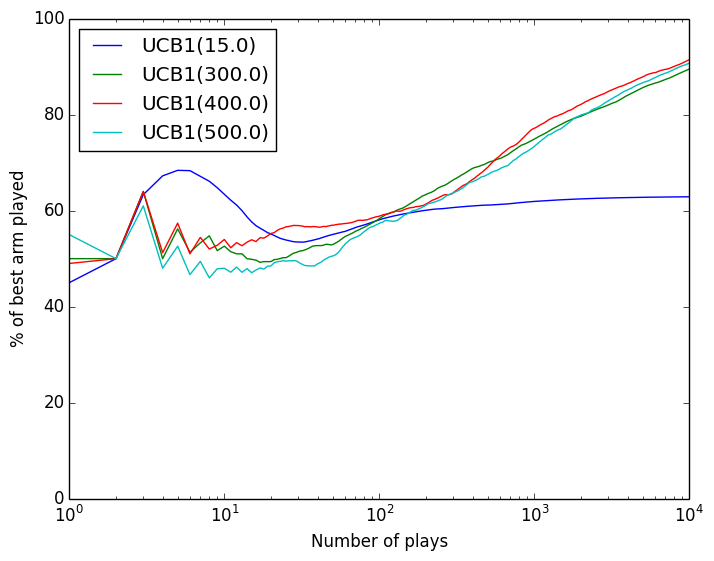

In [37]:
plotExpParam([RareDist(0.1, -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0.1, -1000., Truncated(Normal(-70, 10), -120, -20))], :UCB1, [15, 300, 400, 500]);

Arm 1: Truncated(Distributions.Normal(μ=-30.0, σ=4.0), range=(-50.0, -10.0))
Arm 2: Truncated(Distributions.Normal(μ=-70.0, σ=10.0), range=(-120.0, -20.0))
mean of reward: -30.0, -70.0

Best arm: 1



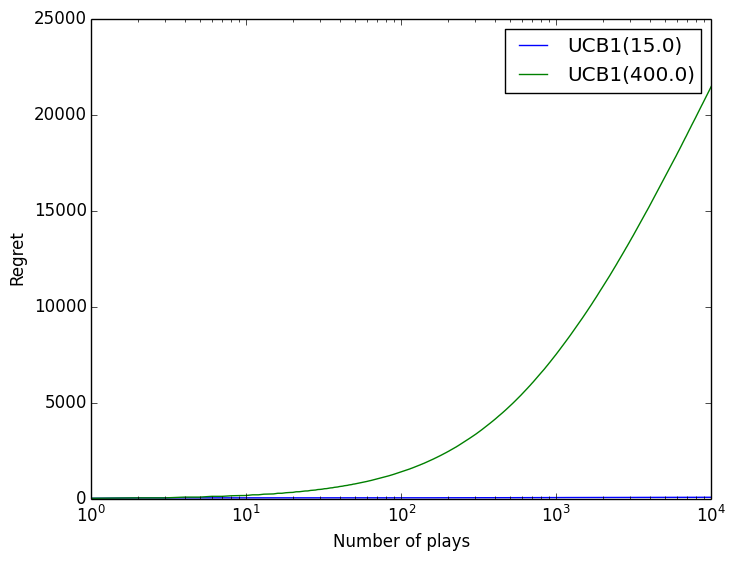

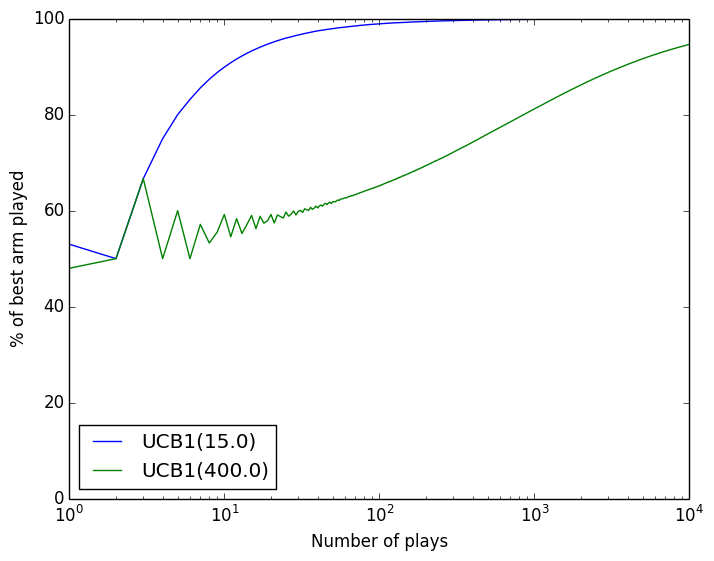

In [39]:
plotExpPolicy([RareDist(0., -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0., -1000., Truncated(Normal(-70, 10), -120, -20))], Any[Any[:UCB1, 15], Any[:UCB1, 400]]);

Arm 1: 0.1, -1000.0; 0.9, Truncated(Distributions.Normal(μ=-30.0, σ=4.0), range=(-50.0, -10.0))
Arm 2: 0.1, -1000.0; 0.9, Truncated(Distributions.Normal(μ=-70.0, σ=10.0), range=(-120.0, -20.0))
mean of reward: -127.0, -163.0

Best arm: 1



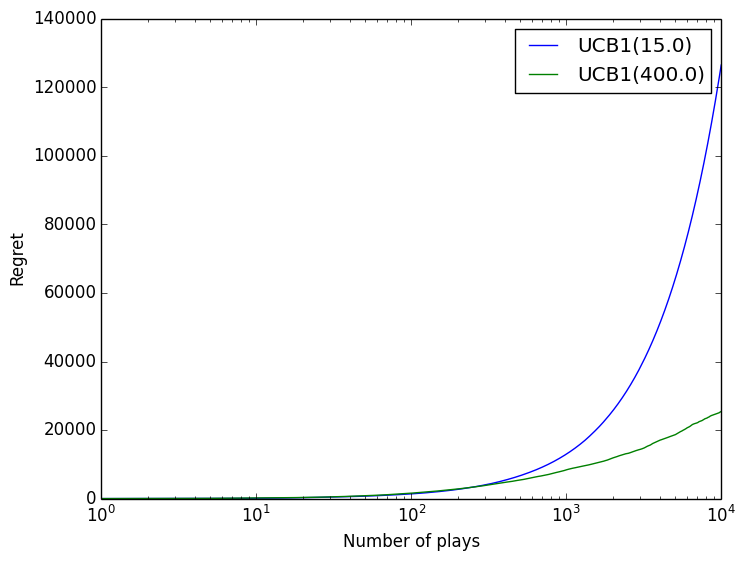

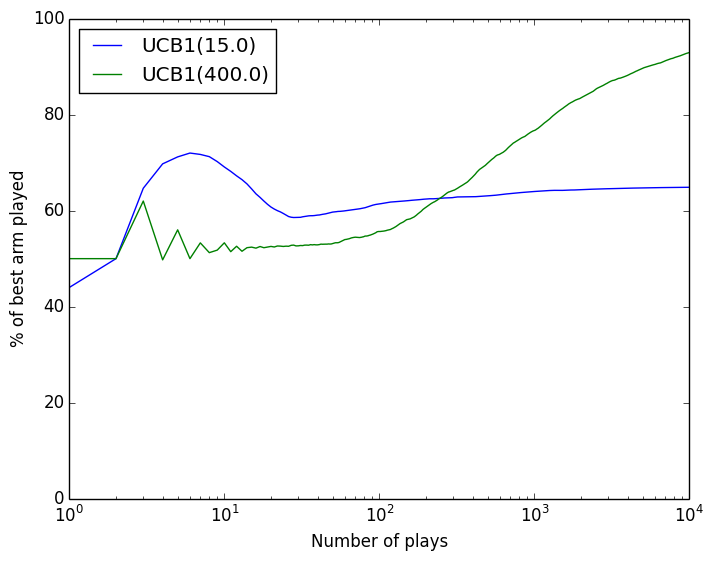

In [40]:
plotExpPolicy([RareDist(0.1, -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0.1, -1000., Truncated(Normal(-70, 10), -120, -20))], Any[Any[:UCB1, 15], Any[:UCB1, 400]]);

Arm 1: 0.1, -1000.0; 0.9, Truncated(Distributions.Normal(μ=-30.0, σ=4.0), range=(-50.0, -10.0))
Arm 2: 0.1, -1000.0; 0.9, Truncated(Distributions.Normal(μ=-70.0, σ=10.0), range=(-120.0, -20.0))
mean of reward: -127.0, -163.0

Best arm: 1



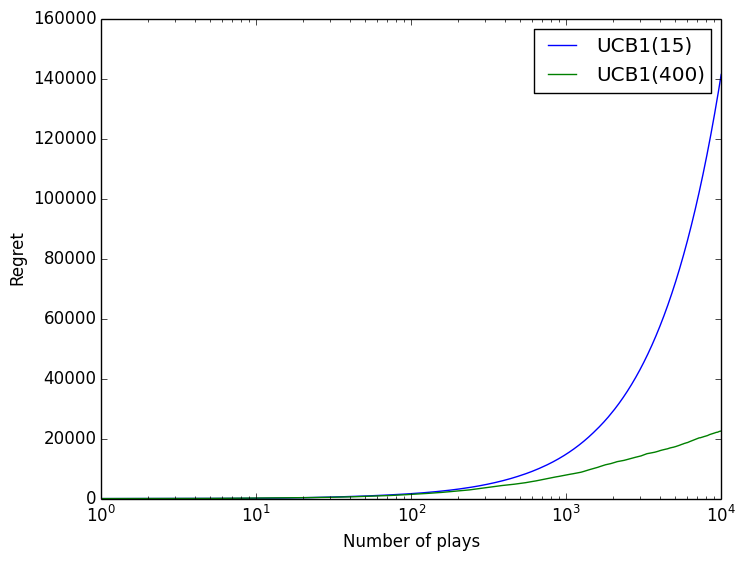

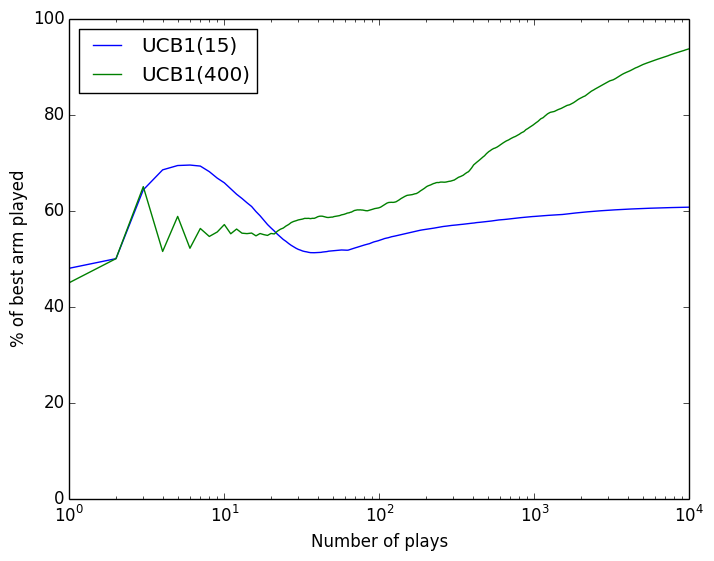

In [55]:
plotExpPolicy([RareDist(0.1, -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0.1, -1000., Truncated(Normal(-70, 10), -120, -20))], Any[Any[:UCB1, 15], Any[:UCB1, 400]]);

Arm 1: Truncated(Distributions.Normal(μ=-30.0, σ=4.0), range=(-50.0, -10.0))
Arm 2: Truncated(Distributions.Normal(μ=-70.0, σ=10.0), range=(-120.0, -20.0))
mean of reward: -30.0, -70.0

Best arm: 1



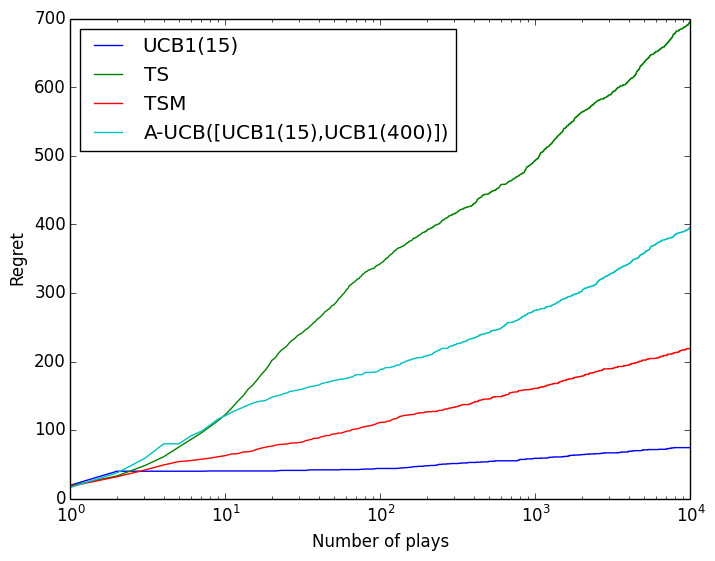

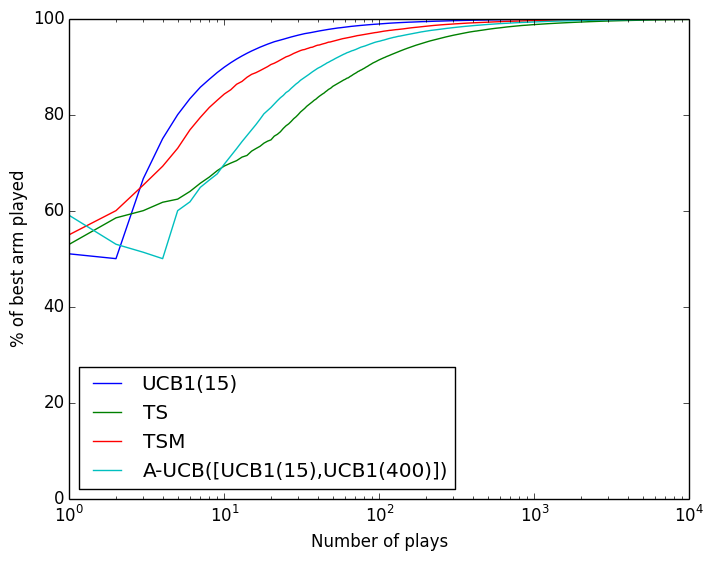

In [6]:
plotExpPolicy([RareDist(0., -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0., -1000., Truncated(Normal(-70, 10), -120, -20))], Any[Any[:UCB1, 15], Any[:TS], Any[:TSM, generateArmRewardModel], Any[:AUCB, [genUCBSubArm(15), genUCBSubArm(400)]]]);

Arm 1: 0.01, -1000.0; 0.99, Truncated(Distributions.Normal(μ=-30.0, σ=4.0), range=(-50.0, -10.0))
Arm 2: Truncated(Distributions.Normal(μ=-70.0, σ=10.0), range=(-120.0, -20.0))
mean of reward: -39.7, -70.0

Best arm: 1



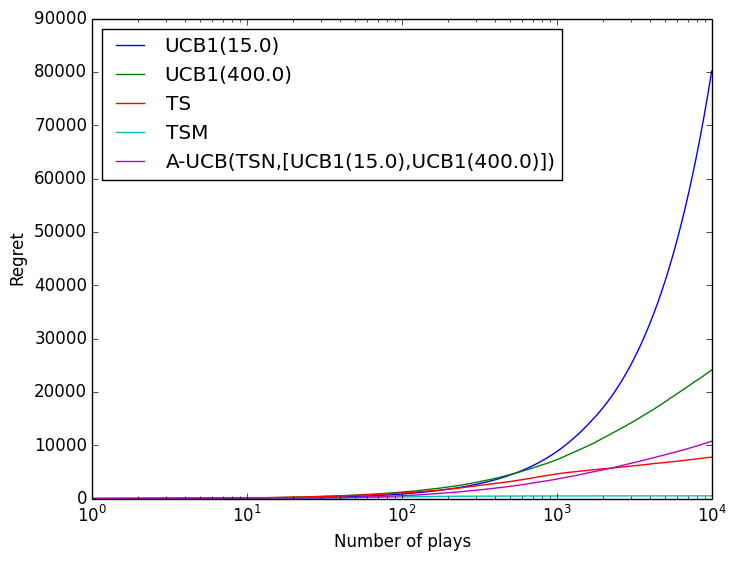

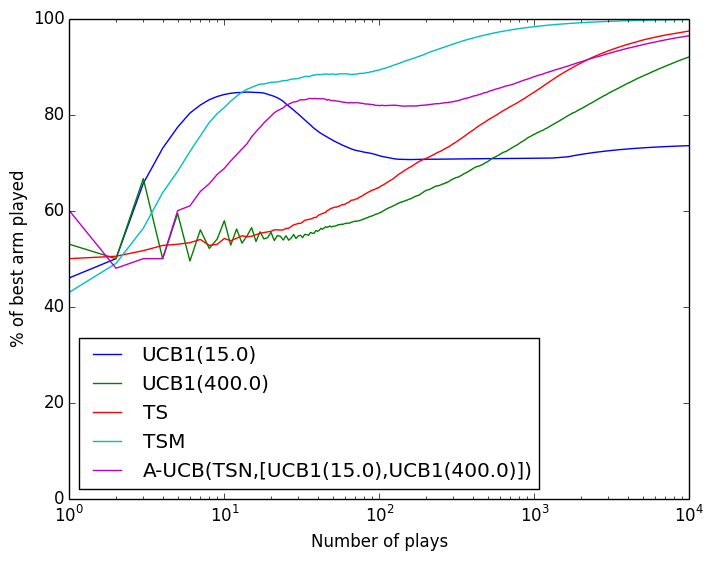

In [54]:
plotExpPolicy([RareDist(0.01, -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0., -1000., Truncated(Normal(-70, 10), -120, -20))], Any[Any[:UCB1, 15], Any[:UCB1, 400], Any[:TS], Any[:TSM, generateArmRewardModel], Any[:AUCB, [genUCBSubArm(15), genUCBSubArm(400)]]]);

Arm 1: 0.1, -1000.0; 0.9, Truncated(Distributions.Normal(μ=-30.0, σ=4.0), range=(-50.0, -10.0))
Arm 2: 0.1, -1000.0; 0.9, Truncated(Distributions.Normal(μ=-70.0, σ=10.0), range=(-120.0, -20.0))
mean of reward: -127.0, -163.0

Best arm: 1



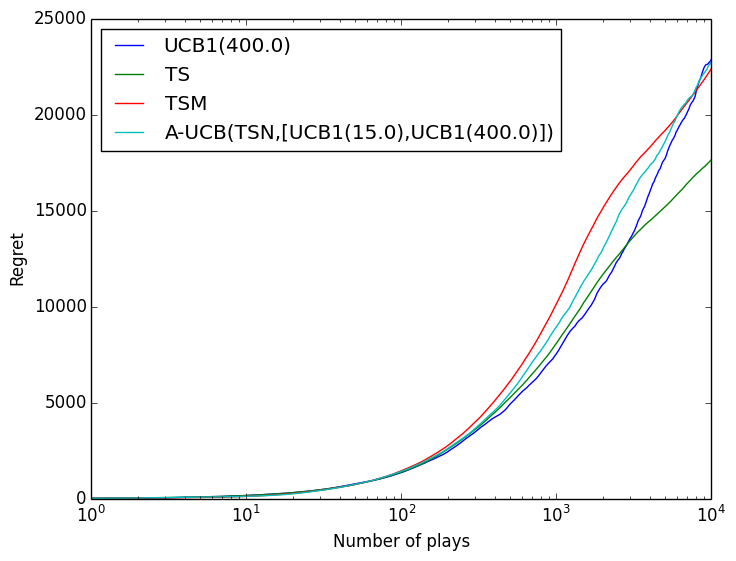

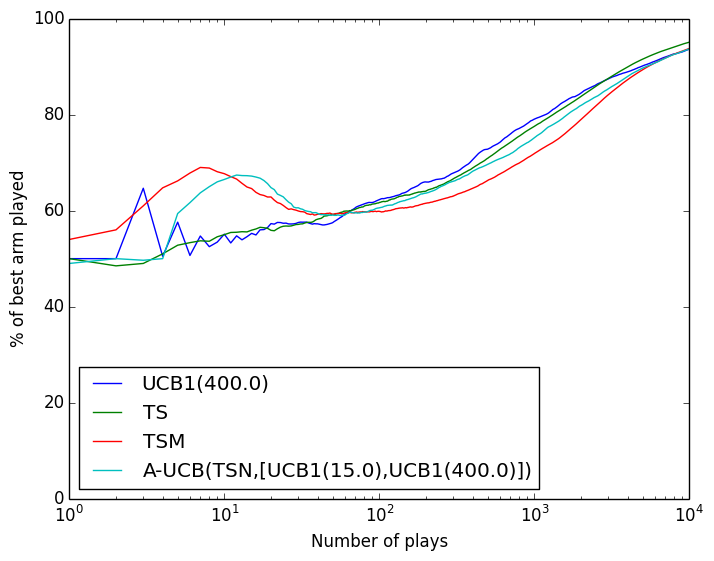

In [52]:
plotExpPolicy([RareDist(0.1, -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0.1, -1000., Truncated(Normal(-70, 10), -120, -20))], Any[Any[:UCB1, 400], Any[:TS], Any[:TSM, generateArmRewardModel], Any[:AUCB, [genUCBSubArm(15), genUCBSubArm(400)]]]);